<a href="https://colab.research.google.com/github/Chinmay2808/DecoderBot/blob/main/Flight_Price_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

from sklearn.feature_extraction import DictVectorizer



%matplotlib inline

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# get data
df_main = pd.read_csv("/content/drive/MyDrive/Clean_Dataset.csv")

In [ ]:
df_main.shape


(300153, 12)

In [ ]:
df_main.shape


(300153, 12)

In [ ]:

df_main.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:

df_main.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
for col in list(df_main.columns):
    print("\nfor column : ", col,"\n")
    print(df_main[col].value_counts())


for column :  airline 

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

for column :  flight 

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

for column :  source_city 

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

for column :  departure_time 

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

for column :  stops 

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

for column :  arrival_time 

Night            91538
Evening          78323
Morning        

In [ ]:
categorical_cols = ['airline','source_city','departure_time', 'arrival_time', 'destination_city','class']

In [ ]:
df_main.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

<Axes: >

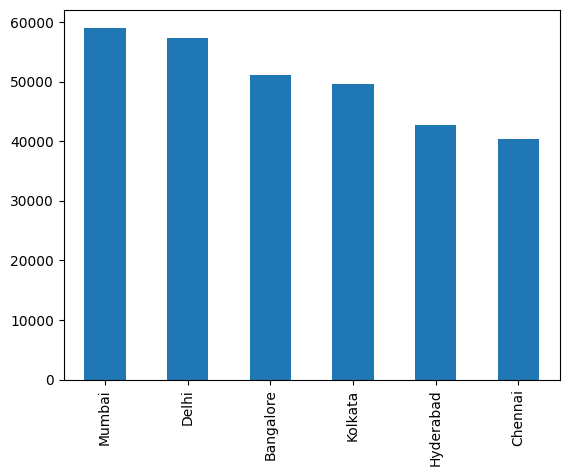

In [ ]:
df_main.destination_city.value_counts().plot.bar()

<Axes: xlabel='destination_city'>

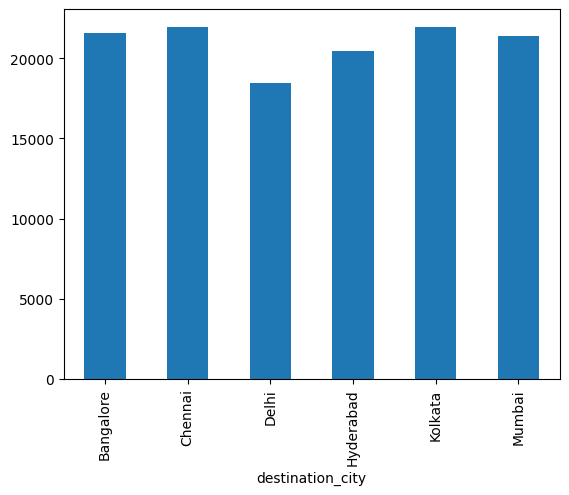

In [ ]:
df_main.groupby("destination_city")['price'].mean().plot.bar()

<Axes: xlabel='source_city'>

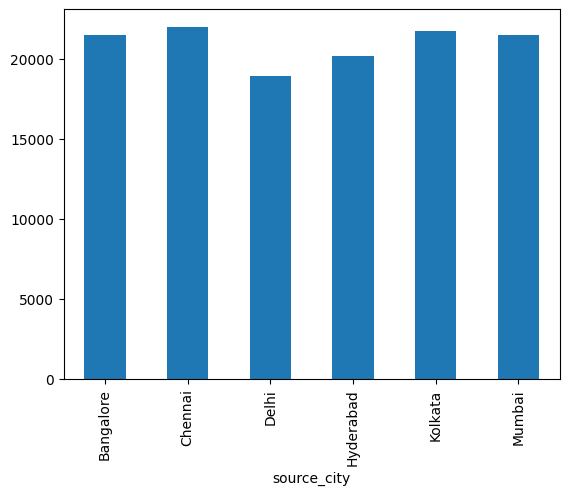

In [ ]:

df_main.groupby("source_city")['price'].mean().plot.bar()

<Axes: xlabel='airline'>

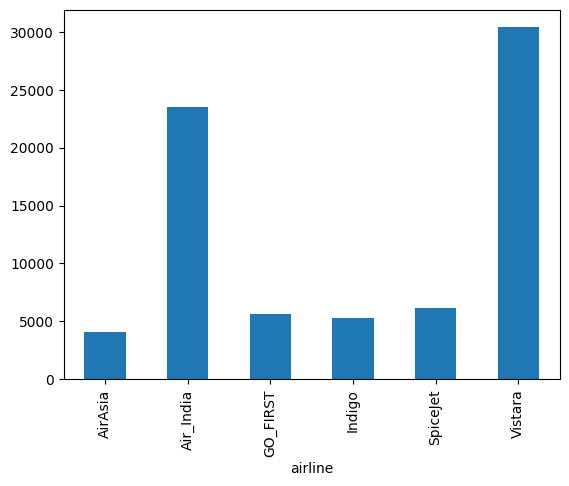

In [ ]:

df_main.groupby("airline")['price'].mean().plot.bar()

<Axes: >

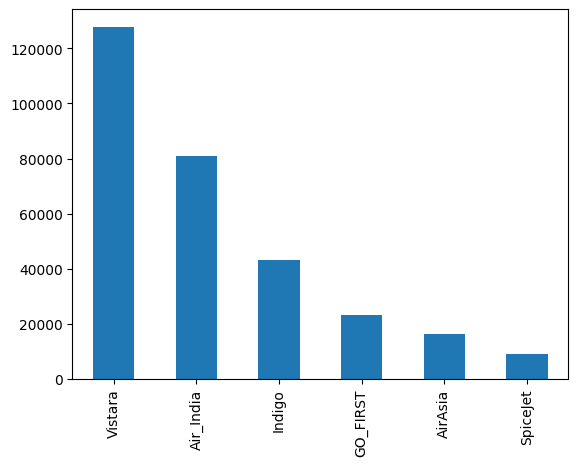

In [ ]:

df_main.airline.value_counts().plot.bar()

<Axes: xlabel='stops'>

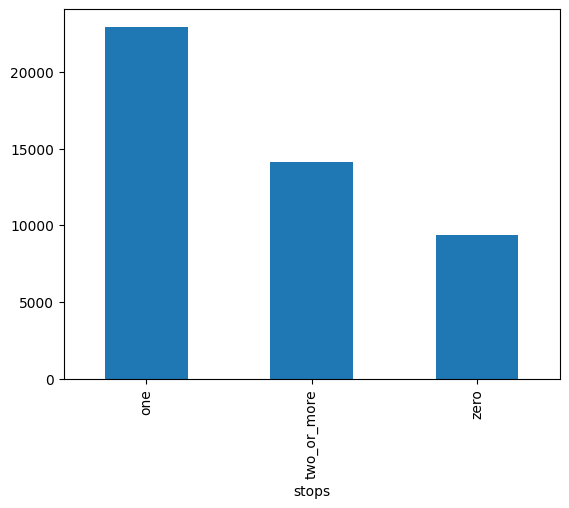

In [ ]:

df_main.groupby("stops")['price'].mean().plot.bar()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


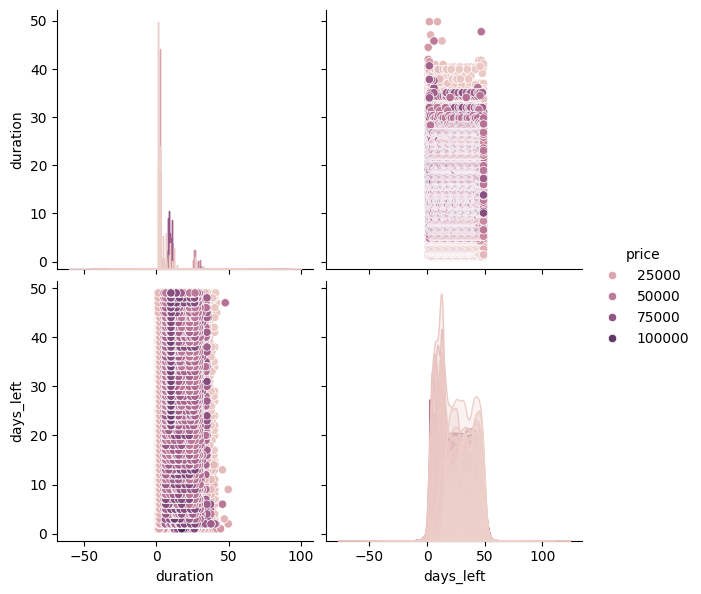

In [ ]:
sns.pairplot(df_main, hue = "price", size = 3)

<Axes: xlabel='days_left'>

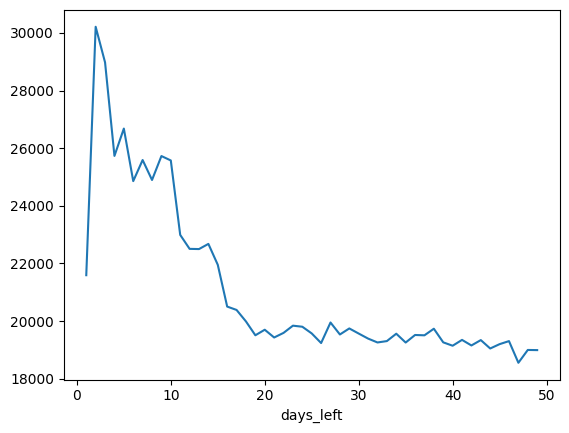

In [ ]:
df_main.groupby("days_left")['price'].mean().plot()


<Axes: xlabel='departure_time'>

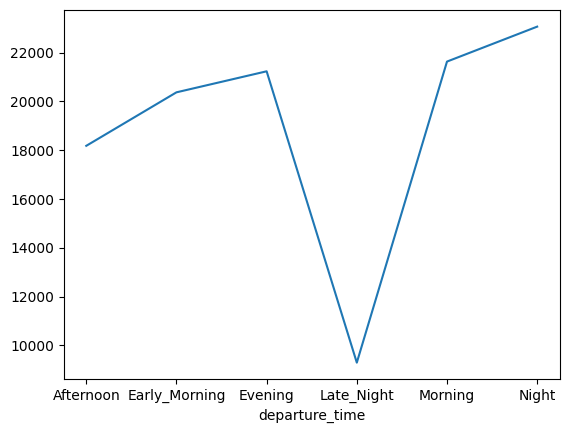

In [ ]:
df_main.groupby("departure_time")['price'].mean().plot()


<Axes: xlabel='arrival_time'>

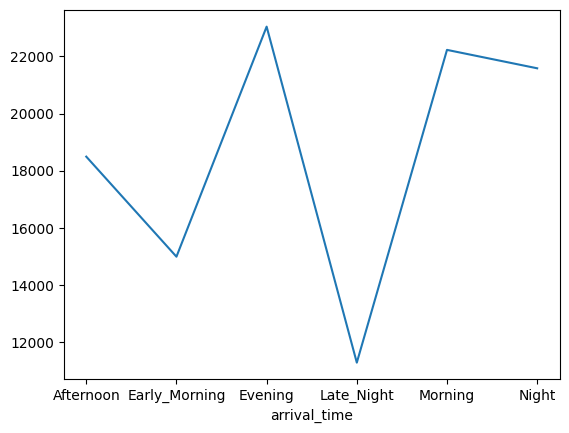

In [ ]:
df_main.groupby("arrival_time")['price'].mean().plot()


<Axes: xlabel='class', ylabel='price'>

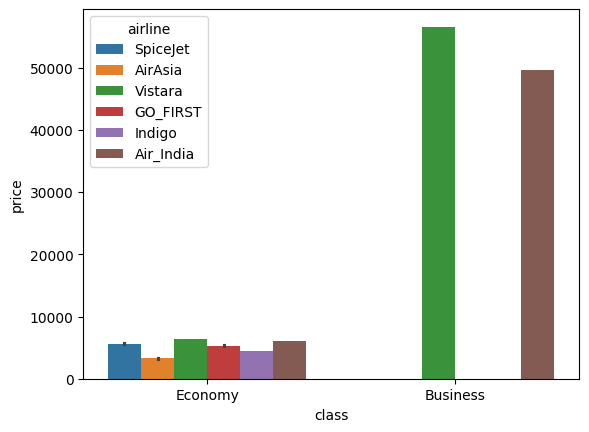

In [ ]:
sns.barplot(x = "class", y ="price",  data = df_main, estimator = np.median, hue = "airline")


<Axes: ylabel='Frequency'>

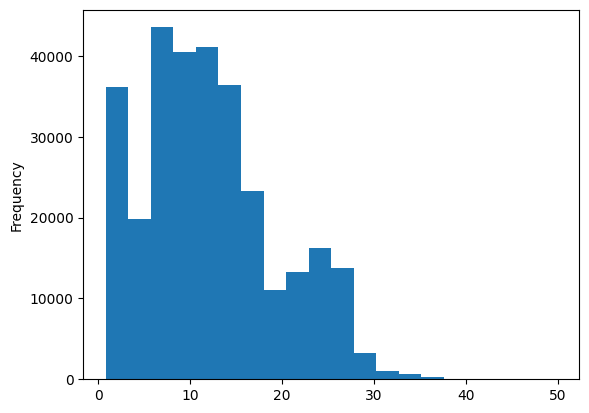

In [ ]:
df_main.duration.plot.hist(bins = 20)


<ipython-input-27-28ce41860bc7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_main.corr(), annot = True)


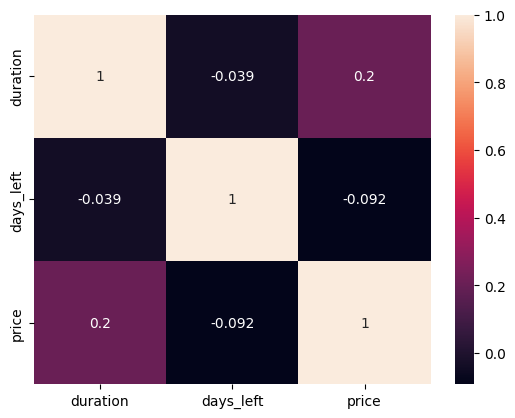

In [ ]:
sns.heatmap(df_main.corr(), annot = True)
plt.show()

In [ ]:
df_main[['airline_code', 'flight_number']] = df_main['flight'].str.split('-', n=1, expand=True)
df_main.drop("flight", axis = 1, inplace = True)
df_main.drop("airline_code", axis = 1, inplace = True)

In [ ]:
df_main['flight_number'] = df_main['flight_number'].astype('int')


In [ ]:
df_main.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,963


In [ ]:
df_main.flight_number.value_counts()


808     3313
706     3235
772     2860
774     2808
720     2650
        ... 
8480       1
405        1
3211       1
9974       1
1058       1
Name: flight_number, Length: 1254, dtype: int64

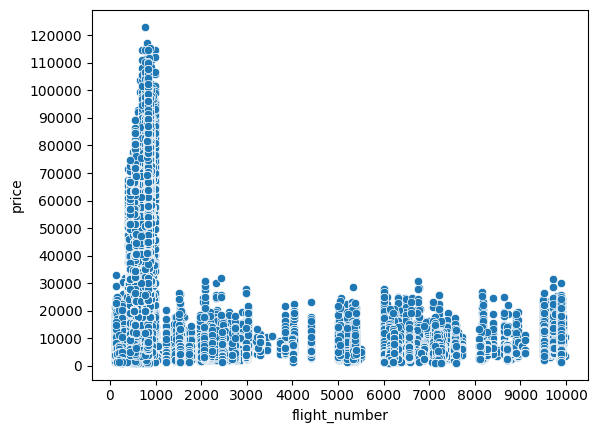

In [ ]:
# df_main.groupby("flight_number")['price'].mean().plot()
sns.scatterplot(x = "flight_number", y = "price", data = df_main)
plt.xticks(range(0,10001,1000))
plt.yticks(range(0,120001,10000))
plt.show()

In [ ]:
le = LabelEncoder()


In [ ]:
df_main['stops'] = df_main['stops'].replace({'one': 1,
                                   'zero': 0,
                                   'two_or_more': 2})

In [ ]:
df_main[categorical_cols] = df_main[categorical_cols].apply(le.fit_transform)

In [ ]:
# for column in categorical_cols:
#     df_main[column] = le.fit_transform(df_main[column])

label_encoders = []
for column in categorical_cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df_main[column])
    label_encoders.append(label_encoder)
np.save("label_encoders.npy", label_encoders)

In [ ]:

# df_main[categorical_cols] = le.fit_transform(df_main[categorical_cols])


In [ ]:
df_main.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,4,2,2,0,5,5,1,2.17,1,5953,8709
1,4,2,1,0,4,5,1,2.33,1,5953,8157
2,0,2,1,0,1,5,1,2.17,1,5956,764
3,5,2,4,0,0,5,1,2.25,1,5955,995
4,5,2,4,0,4,5,1,2.33,1,5955,963


In [ ]:
import joblib
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
label_encoding_mappings = {}

for column in categorical_cols:
    label_encoding_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
label_encoding_mappings


{'airline': {'Business': 0, 'Economy': 1},
 'source_city': {'Business': 0, 'Economy': 1},
 'departure_time': {'Business': 0, 'Economy': 1},
 'arrival_time': {'Business': 0, 'Economy': 1},
 'destination_city': {'Business': 0, 'Economy': 1},
 'class': {'Business': 0, 'Economy': 1}}

In [ ]:
# You can save the label encoding mappings to a file (e.g., JSON)
import json

json.dump(label_encoding_mappings, "label_encoding_mappings.json")

AttributeError: 'str' object has no attribute 'write'

In [ ]:
df_main.to_csv("/content/drive/MyDrive/final_ds.csv")


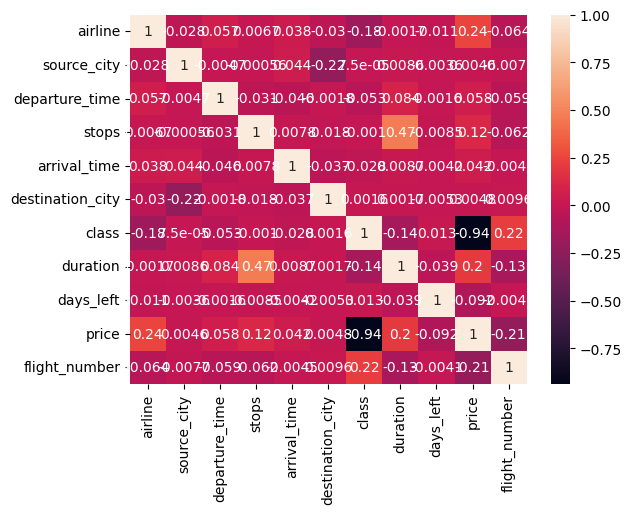

In [ ]:
sns.heatmap(df_main.corr(), annot = True)
plt.show()

In [ ]:
x = df_main.drop('price', axis = 1)
y = df_main['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


In [ ]:
kf = KFold(shuffle=True, random_state=42, n_splits=5)


In [ ]:
s = StandardScaler()
lr = LinearRegression()

In [ ]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [ ]:
predictions = cross_val_predict(estimator, x, y, cv=kf)


In [ ]:
r2_score(y, predictions)


0.9063636882936632

In [ ]:
mean_absolute_error(y,predictions)


4545.996044591107

In [ ]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [ ]:
las = Lasso()


In [ ]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, x, y, cv = kf)

    score = r2_score(y, predictions)

    scores.append(score)

In [ ]:
list(zip(alphas,scores))


[(1e-09, 0.9063636882936632),
 (1e-08, 0.9063636882936632),
 (1e-07, 0.906363688293663),
 (1e-06, 0.9063636882936594),
 (1e-05, 0.9063636882936199),
 (0.0001, 0.9063636882933672),
 (0.001, 0.9063636882903774),
 (0.01, 0.9063636882403515),
 (0.1, 0.9063636878222452),
 (1.0, 0.9063636674357426)]

In [ ]:
Lasso(alpha=1e-6).fit(x, y).coef_


array([ 9.56567751e+02,  1.12733502e+02,  8.91226224e+01,  6.11007662e+03,
        1.66349607e+02,  1.62211911e+02, -4.50616969e+04,  7.28046323e+01,
       -1.29128693e+02,  1.84544036e-02])

In [ ]:
Lasso(alpha=1.0).fit(x, y).coef_


array([ 9.56514668e+02,  1.12298807e+02,  8.86899314e+01,  6.10144221e+03,
        1.66047091e+02,  1.61736464e+02, -4.50563837e+04,  7.30570188e+01,
       -1.29123568e+02,  1.81722432e-02])

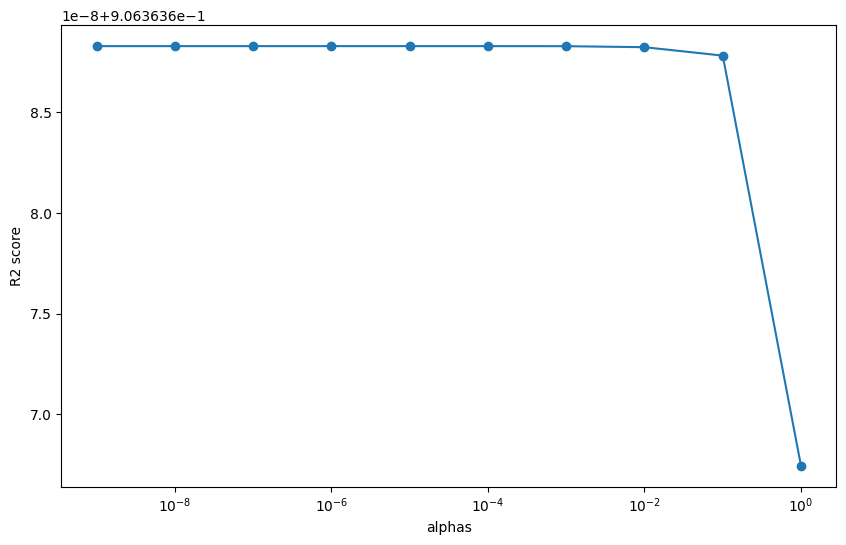

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('alphas')
plt.ylabel('R2 score');


In [ ]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(x, y)
best_estimator.score(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.208e+11, tolerance: 1.546e+10
  model = cd_fast.enet_coordinate_descent(


0.9401489791705203

In [ ]:
predii = cross_val_predict(best_estimator, x, y, cv=kf)
r2_score(y, predii)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.745e+11, tolerance: 1.237e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+11, tolerance: 1.236e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+11, tolerance: 1.237e

0.9401181954663129

In [ ]:
# Same estimator as before

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(x,y)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [ ]:
y_predict = grid.predict(x)


In [ ]:
r2_score(y, y_predict)


0.9485521365059661

In [ ]:
# Parameter_Trials={'n_estimators':[100,200,300,500,1000],
#                   'criterion':['gini','entropy'],
#                   'max_depth': [2,3]}

# best_estimator = Pipeline([
#                     ("scaler", s),
#                     ("make_higher_degree", PolynomialFeatures(degree=2)),
#                     ("ridge_regression", Ridge(alpha=0.03))])

# Random_Search = RandomizedSearchCV(best_estimator, Parameter_Trials, n_iter=5, cv=5, n_jobs=1, verbose=5)
# RandomSearchResults=Random_Search.fit(x,y)

In [ ]:
# RandomSearchResults.best_params_


In [ ]:
import joblib
joblib.dump(grid, "model_main_1.pkl")

['model_main_1.pkl']

In [ ]:
x


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,flight_number
0,4,2,2,0,5,5,1,2.17,1,8709
1,4,2,1,0,4,5,1,2.33,1,8157
2,0,2,1,0,1,5,1,2.17,1,764
3,5,2,4,0,0,5,1,2.25,1,995
4,5,2,4,0,4,5,1,2.33,1,963
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,1,2,3,0,10.08,49,822
300149,5,1,0,1,5,3,0,10.42,49,826
300150,5,1,1,1,5,3,0,13.83,49,832
300151,5,1,1,1,2,3,0,10.00,49,828


In [ ]:
joblib.dump(estimator, 'pipeline_trans.joblib')


['pipeline_trans.joblib']

In [ ]:
x.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,flight_number
0,4,2,2,0,5,5,1,2.17,1,8709
1,4,2,1,0,4,5,1,2.33,1,8157
2,0,2,1,0,1,5,1,2.17,1,764
3,5,2,4,0,0,5,1,2.25,1,995
4,5,2,4,0,4,5,1,2.33,1,963


In [ ]:
y.head()


0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64